In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import seaborn as sns
from cmcrameri import cm

mpl.rcParams['lines.markersize']=10
mpl.rcParams['axes.titlesize']=30
mpl.rcParams['legend.fontsize']=20
mpl.rcParams['xtick.labelsize']=15
mpl.rcParams['ytick.labelsize']=15
mpl.rcParams['axes.labelsize']=20

In [11]:
dt=0.05   
dt_solver=0.01
model_dim=40
num_clv=40
model_name='L96'
seed_num=3

spr=1
t_start=0
t_stop=2000

In [12]:
data_path='/home/shashank/Documents/Data Assimilation/ENKF_for_CLVs/data/L96/L96-{}/state'.format(model_dim)
start_idx=1000
base_type='State'
os.chdir(data_path)
#base_traj=np.load('{}_g={}_sigma={}.npy'.format(base_type,dt,0.0))[start_idx:]
C=np.load('matrices_c_{}_model_{}_{}.npy'.format(model_dim,model_name,base_type))[t_start:t_stop]
G=np.load('matrices_g_{}_model_{}_{}.npy'.format(model_dim,model_name,base_type))[t_start:t_stop]

print(C.shape)
print(G.shape)
V=np.zeros_like(G)
for i in range(G.shape[0]):
    V[i]=G[i]@C[i] 

(2000, 40, 40)
(2000, 40, 40)


In [13]:
# Change to data pa
os.chdir('/home/shashank/Documents/Data Assimilation/ENKF_for_CLVs/data/L96/L96-{}/assimilated_trajs'.format(model_dim))
os.chdir('mu=0.0_times_I20')
C2=np.load('matrices_c_{}_model_{}_{}.npy'.format(model_dim,model_name,base_type))[t_start:t_stop]
G2=np.load('matrices_g_{}_model_{}_{}.npy'.format(model_dim,model_name,base_type))[t_start:t_stop]

print(C2.shape)
print(G2.shape)
#print(noisy_traj.shape)
V2=np.zeros_like(G2)
for i in range(G2.shape[0]):
    V2[i]=G2[i]@C2[i]   


(2000, 40, 40)
(2000, 40, 40)


In [33]:
cosines=np.zeros((G.shape[0],num_clv))
for i in range(G.shape[0]):
    for j in range(num_clv):
        cosines[i,j]=np.absolute(np.dot(V2[i,:,j],V[i,:,j]))

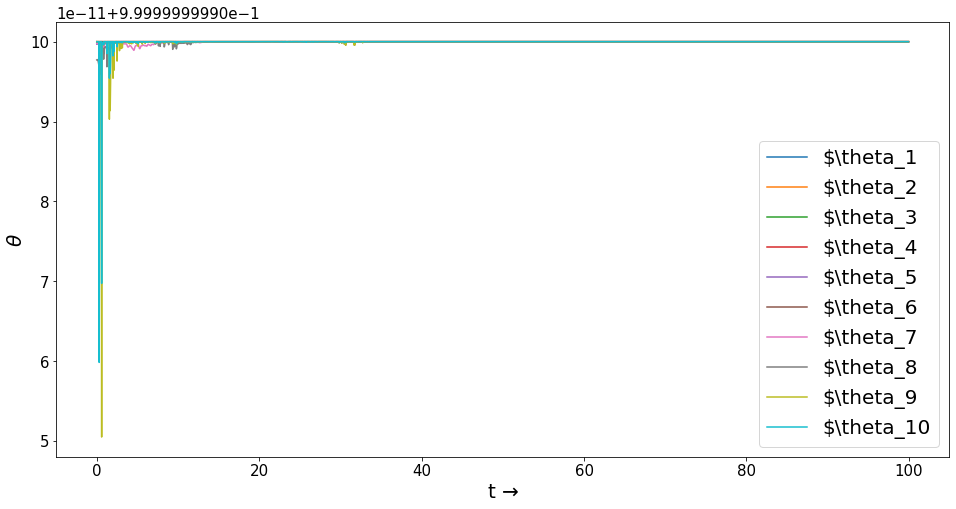

In [36]:
plt.figure(figsize=(16,8))
for i in range(10):
    plt.plot(dt*np.arange(cosines.shape[0]),cosines[:,i],label=r'$\theta_{}'.format(i+1))
plt.xlabel(r't $\to$')
plt.ylabel(r'$\theta$')
plt.legend()

In [28]:
cosines[4]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.99999999, 0.99999999, 1.        , 0.99999984,
       0.99999984, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99999923, 0.99999923, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])